In [11]:
import pandas as pd
import matplotlib.pyplot as plt

## GRAD CAM

In [12]:
model1_df = pd.read_csv('grad_cam_2f_events_correct_predictions.csv').drop(columns=["Unnamed: 0"], axis = 1 )
model2_df = pd.read_csv('new_grad_cam_2f_events_correct_predictions.csv').drop(columns=["Unnamed: 0"], axis = 1 )

In [13]:
model1_df.head()

,Filename,Predicted Label,Actual Label,events_before,events_after,cam_pred_labels,not_common
0,/work/aistwal/dataset_tau2019/extracted-files/...,street_pedestrian,street_pedestrian,"['Speech', 'Clip-clop', 'Animal', 'Run', 'Hors...","['Speech', 'Animal', 'Clip-clop', 'Horse', 'Ru...",street_pedestrian,"{'Walk, footsteps'}"
1,/work/aistwal/dataset_tau2019/extracted-files/...,metro,metro,"['Train', 'Rail transport', 'Vehicle', 'Railro...","['Vehicle', 'Train', 'Car', 'Music', 'Speech',...",metro,"{'Subway, metro, underground', 'Outside, rural..."
2,/work/aistwal/dataset_tau2019/extracted-files/...,street_pedestrian,street_pedestrian,"['Speech', 'Music', 'Vehicle', 'Chatter', 'Out...","['Speech', 'Music', 'Vehicle', 'Outside, urban...",street_pedestrian,"{'Inside, large room or hall', 'Crowd', 'Chatt..."
3,/work/aistwal/dataset_tau2019/extracted-files/...,street_traffic,street_traffic,"['Vehicle', 'White noise', 'Silence', 'Car', '...","['Vehicle', 'Car', 'Speech', 'Silence', 'Outsi...",street_traffic,"{'Train', 'Mouse', 'Rustle'}"
4,/work/aistwal/dataset_tau2019/extracted-files/...,airport,airport,"['Speech', 'Clip-clop', 'Horse', 'Animal', 'Ru...","['Speech', 'Clip-clop', 'Horse', 'Animal', 'Ge...",airport,"{'Outside, urban or manmade'}"


In [14]:
model2_df.head()

,Filename,Actual Label,Predicted Label,events_before,events_after,cam_pred_labels,not_common
0,audio/street_pedestrian-lyon-1162-44093-a.wav,street_pedestrian,street_pedestrian,"['Speech', 'Animal', 'Clip-clop', 'Horse', 'Bi...","['Speech', 'Animal', 'Clip-clop', 'Horse', 'Bi...",street_pedestrian,"{'Coo', 'Pigeon, dove'}"
1,audio/metro-prague-1163-44094-a.wav,metro,metro,"['Train', 'Vehicle', 'Field recording', 'Railr...","['Vehicle', 'Explosion', 'Car', 'Field recordi...",metro,"{'Outside, rural or natural', 'Subway, metro, ..."
2,audio/park-milan-1164-44095-a.wav,park,park,"['Speech', 'Silence', 'Caw', 'Animal', 'Crow',...","['Speech', 'Silence', 'Animal', 'Vehicle', 'Cr...",park,{'Music'}
3,audio/street_pedestrian-milan-1165-44096-a.wav,street_pedestrian,street_pedestrian,"['Speech', 'Music', 'Vehicle', 'Train', 'Outsi...","['Speech', 'Music', 'Vehicle', 'Animal', 'Outs...",street_pedestrian,"{'Railroad car, train wagon'}"
4,audio/street_traffic-milan-1166-44097-a.wav,street_traffic,street_traffic,"['Vehicle', 'Train', 'Speech', 'Railroad car, ...","['Vehicle', 'Silence', 'Car', 'Speech', 'Train...",street_traffic,"{'White noise', 'Aircraft', 'Ship'}"


In [15]:
# Preprocessing
# Remove entries from model1 
ThisPath = '/work/aistwal/dataset_tau2019/extracted-files/TAU-urban-acoustic-scenes-2019-development/'

model1_df = model1_df[model1_df['Predicted Label'] == model1_df['cam_pred_labels']]
model2_df['Filename'] = model2_df['Filename'].apply(lambda x : ThisPath+x)

In [16]:
# Both models perform good on "street_traffic" and "tram" scenes
st_model1 = model1_df.groupby(['Actual Label'])[['Filename', 'events_after']].get_group('street_traffic')
tram_model1 = model1_df.groupby(['Actual Label'])[['Filename', 'events_after']].get_group('tram')

st_model2 = model2_df.groupby(['Actual Label'])[['Filename', 'events_after']].get_group('street_traffic')
tram_model2 = model2_df.groupby(['Actual Label'])[['Filename', 'events_after']].get_group('tram')

/tmp/ipykernel_2312417/314861999.py:2: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  st_model1 = model1_df.groupby(['Actual Label'])[['Filename', 'events_after']].get_group('street_traffic')
/tmp/ipykernel_2312417/314861999.py:3: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  tram_model1 = model1_df.groupby(['Actual Label'])[['Filename', 'events_after']].get_group('tram')
/tmp/ipykernel_2312417/314861999.py:5: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  st_model2 = model2_df.groupby(['Actual Label'])[['Filename', 'events_after']].get_

In [17]:
print(len(st_model1), len(tram_model1))
print(len(st_model2), len(tram_model2))


352 246
362 341


### STREET TRAFFIC

In [18]:
# For the same set of audios for which both the model classified correctly extract the percentages of common events of importance
st = st_model1.merge(st_model2, how='inner', on="Filename")
st

,Filename,events_after_x,events_after_y
0,/work/aistwal/dataset_tau2019/extracted-files/...,"['Vehicle', 'Car', 'Speech', 'Silence', 'Outsi...","['Vehicle', 'Silence', 'Car', 'Speech', 'Train..."
1,/work/aistwal/dataset_tau2019/extracted-files/...,"['Vehicle', 'Car', 'Outside, urban or manmade'...","['Vehicle', 'Car', 'Sliding door', 'Bus', 'Doo..."
2,/work/aistwal/dataset_tau2019/extracted-files/...,"['Vehicle', 'Animal', 'Speech', 'Music', 'Car'...","['Vehicle', 'Sonar', 'Silence', 'White noise',..."
3,/work/aistwal/dataset_tau2019/extracted-files/...,"['Vehicle', 'Car', 'Outside, urban or manmade'...","['Vehicle', 'Outside, rural or natural', 'Anim..."
4,/work/aistwal/dataset_tau2019/extracted-files/...,"['Vehicle', 'Car', 'Car passing by', 'Outside,...","['Vehicle', 'Car', 'Bus', 'Truck', 'Motor vehi..."
...,...,...,...
328,/work/aistwal/dataset_tau2019/extracted-files/...,"['Vehicle', 'Car', 'Outside, urban or manmade'...","['Vehicle', 'Car', 'Waves, surf', 'Ocean', 'Pi..."
329,/work/aistwal/dataset_tau2019/extracted-files/...,"['Vehicle', 'Car', 'Outside, urban or manmade'...","['Vehicle', 'Waves, surf', 'Ocean', 'Wind nois..."
330,/work/aistwal/dataset_tau2019/extracted-files/...,"['Vehicle', 'Car', 'Outside, urban or manmade'...","['Vehicle', 'Waves, surf', 'Ocean', 'Pink nois..."
331,/work/aistwal/dataset_tau2019/extracted-files/...,"['Vehicle', 'Car', 'Outside, urban or manmade'...","['Vehicle', 'Waterfall', 'Speech', 'White nois..."


In [19]:
import ast

# Flatten the list of events and extract unique events
unique_events_st_model1 = set(event for sublist in st['events_after_x'] for event in ast.literal_eval(sublist))
unique_events_st_model2 = set(event for sublist in st['events_after_y'] for event in ast.literal_eval(sublist))

print(len(unique_events_st_model1))
print(len(unique_events_st_model2))

# Calculate the common and unique events
common_events = unique_events_st_model1.intersection(unique_events_st_model2)
unique_to_model1 = unique_events_st_model1 - unique_events_st_model2
unique_to_model2 = unique_events_st_model2 - unique_events_st_model1

# Calculate percentages
total_events = len(unique_events_st_model1.union(unique_events_st_model2))
common_percentage = len(common_events) / total_events * 100
unique_percentage = 100 - common_percentage
print(common_percentage)
print(unique_percentage)

77
104
54.700854700854705
45.299145299145295


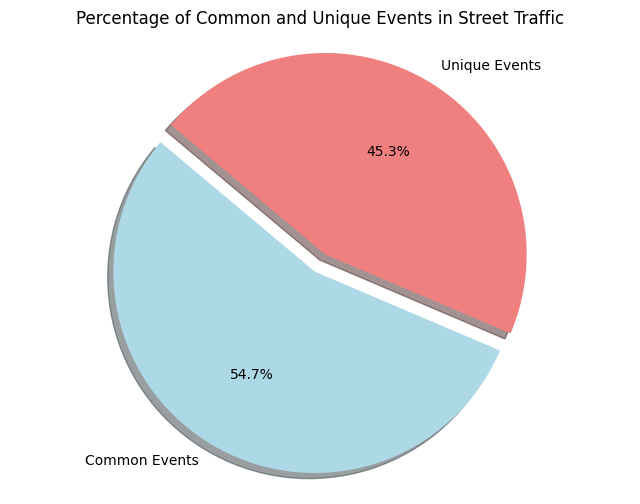

In [20]:
# Plot the percentages
labels = ['Common Events', 'Unique Events']
sizes = [common_percentage, unique_percentage]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Percentage of Common and Unique Events in Street Traffic')
plt.axis('equal')
plt.savefig('cross_model_st_events.png')
plt.show()

### Tram

In [21]:
# For the same set of audios for which both the model classified correctly extract the percentages of common events of importance
tram = tram_model1.merge(tram_model2, how='inner', on="Filename")
tram

,Filename,events_after_x,events_after_y
0,/work/aistwal/dataset_tau2019/extracted-files/...,"['Vehicle', 'Train', 'Car', 'Outside, urban or...","['Vehicle', 'Train', 'Sliding door', 'Car', 'R..."
1,/work/aistwal/dataset_tau2019/extracted-files/...,"['Speech', 'Vehicle', 'Car', 'Bus', 'Music', '...","['Speech', 'Vehicle', 'Train', 'Bus', 'Rail tr..."
2,/work/aistwal/dataset_tau2019/extracted-files/...,"['Vehicle', 'Gears', 'Mechanisms', 'Sliding do...","['Vehicle', 'Train', 'Rail transport', 'Door',..."
3,/work/aistwal/dataset_tau2019/extracted-files/...,"['Speech', 'Vehicle', 'Car', 'Outside, urban o...","['Speech', 'Vehicle', 'Bus', 'Car', 'Sliding d..."
4,/work/aistwal/dataset_tau2019/extracted-files/...,"['Vehicle', 'Train', 'Speech', 'Rail transport...","['Sliding door', 'Vehicle', 'Door', 'Train', '..."
...,...,...,...
217,/work/aistwal/dataset_tau2019/extracted-files/...,"['Speech', 'Throat clearing', 'Vehicle', 'Snee...","['Speech', 'Animal', 'Inside, small room', 'Wi..."
218,/work/aistwal/dataset_tau2019/extracted-files/...,"['Sliding door', 'Door', 'Silence', 'Vehicle',...","['Silence', 'Door', 'Inside, small room', 'Sli..."
219,/work/aistwal/dataset_tau2019/extracted-files/...,"['Speech', 'Vehicle', 'Car', 'Field recording'...","['Vehicle', 'Car', 'Field recording', 'Outside..."
220,/work/aistwal/dataset_tau2019/extracted-files/...,"['Silence', 'Animal', 'Vehicle', 'Bird', 'Outs...","['Vehicle', 'Animal', 'Mouse', 'Bird', 'Silenc..."


In [22]:
import ast

# Flatten the list of events and extract unique events
unique_events_tram_model1 = set(event for sublist in tram['events_after_x'] for event in ast.literal_eval(sublist))
unique_events_tram_model2 = set(event for sublist in tram['events_after_y'] for event in ast.literal_eval(sublist))

print(len(unique_events_tram_model1))
print(len(unique_events_tram_model2))

# Calculate the common and unique events
common_events = unique_events_tram_model1.intersection(unique_events_tram_model2)
unique_to_model1 = unique_events_tram_model1 - unique_events_tram_model2
unique_to_model2 = unique_events_tram_model2 - unique_events_tram_model1

# Calculate percentages
total_events = len(unique_events_tram_model1.union(unique_events_tram_model2))
common_percentage = len(common_events) / total_events * 100
unique_percentage = 100 - common_percentage
print(common_percentage)
print(unique_percentage)

131
144
54.49438202247191
45.50561797752809


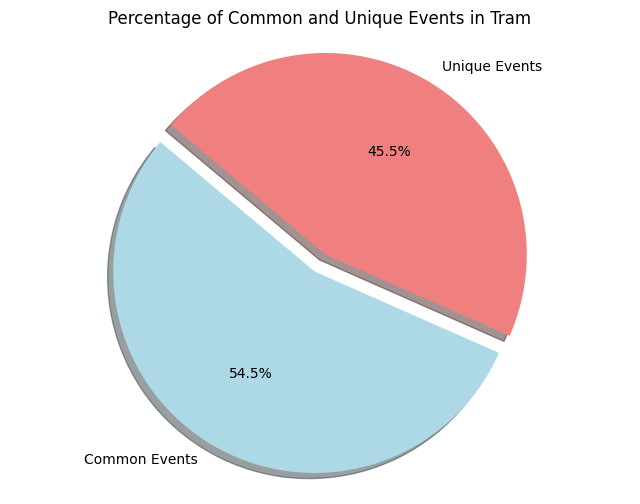

In [23]:
# Plot the percentages
labels = ['Common Events', 'Unique Events']
sizes = [common_percentage, unique_percentage]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Percentage of Common and Unique Events in Tram')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('cross_model_tram_events.png')
plt.show()

## GRAD CAM ++

In [24]:
model1_df = pd.read_csv('grad_cam_plus_2f_events_correct_predictions.csv').drop(columns=["Unnamed: 0"], axis = 1 )
model2_df = pd.read_csv('new_grad_cam_plus_2f_events_correct_predictions.csv').drop(columns=["Unnamed: 0"], axis = 1 )

In [25]:
model1_df.head()

,Filename,Predicted Label,Actual Label,events_before,events_after,cam_pred_labels,not_common
0,/work/aistwal/dataset_tau2019/extracted-files/...,street_pedestrian,street_pedestrian,"['Speech', 'Clip-clop', 'Animal', 'Run', 'Hors...","['Speech', 'Clip-clop', 'Animal', 'Run', 'Hors...",street_pedestrian,set()
1,/work/aistwal/dataset_tau2019/extracted-files/...,metro,metro,"['Train', 'Rail transport', 'Vehicle', 'Railro...","['Vehicle', 'Train', 'Rail transport', 'Railro...",metro,"{'Outside, rural or natural'}"
2,/work/aistwal/dataset_tau2019/extracted-files/...,street_pedestrian,street_pedestrian,"['Speech', 'Music', 'Vehicle', 'Chatter', 'Out...","['Speech', 'Music', 'Vehicle', 'Outside, urban...",street_pedestrian,"{'Inside, large room or hall', 'Crowd', 'Chatt..."
3,/work/aistwal/dataset_tau2019/extracted-files/...,street_traffic,street_traffic,"['Vehicle', 'White noise', 'Silence', 'Car', '...","['White noise', 'Vehicle', 'Mouse', 'Silence',...",street_traffic,"{'Train', 'Inside, small room', 'Rustle'}"
4,/work/aistwal/dataset_tau2019/extracted-files/...,airport,airport,"['Speech', 'Clip-clop', 'Horse', 'Animal', 'Ru...","['Speech', 'Clip-clop', 'Horse', 'Animal', 'Ge...",airport,"{'Outside, urban or manmade'}"


In [26]:
model2_df.head()

,Filename,Actual Label,Predicted Label,events_before,events_after,cam_pred_labels,not_common
0,audio/street_pedestrian-lyon-1162-44093-a.wav,street_pedestrian,street_pedestrian,"['Speech', 'Animal', 'Clip-clop', 'Horse', 'Bi...","['Speech', 'Animal', 'Horse', 'Clip-clop', 'Bi...",street_pedestrian,"{'Pigeon, dove', 'Coo'}"
1,audio/metro-prague-1163-44094-a.wav,metro,metro,"['Train', 'Vehicle', 'Field recording', 'Railr...","['Vehicle', 'Explosion', 'Car', 'Field recordi...",metro,"{'Rumble', 'Aircraft', 'Railroad car, train wa..."
2,audio/park-milan-1164-44095-a.wav,park,park,"['Speech', 'Silence', 'Caw', 'Animal', 'Crow',...","['Speech', 'Silence', 'Vehicle', 'Animal', 'Ou...",park,{'Music'}
3,audio/street_pedestrian-milan-1165-44096-a.wav,street_pedestrian,street_pedestrian,"['Speech', 'Music', 'Vehicle', 'Train', 'Outsi...","['Speech', 'Music', 'Vehicle', 'Animal', 'Clip...",street_pedestrian,"{'Rail transport', 'Railroad car, train wagon'}"
4,audio/street_traffic-milan-1166-44097-a.wav,street_traffic,street_traffic,"['Vehicle', 'Train', 'Speech', 'Railroad car, ...","['Vehicle', 'Silence', 'Car', 'Speech', 'Train...",street_traffic,"{'White noise', 'Ship', 'Aircraft'}"


In [27]:
# Preprocessing
# Remove entries from model1 
ThisPath = '/work/aistwal/dataset_tau2019/extracted-files/TAU-urban-acoustic-scenes-2019-development/'

model1_df = model1_df[model1_df['Predicted Label'] == model1_df['cam_pred_labels']]
model2_df['Filename'] = model2_df['Filename'].apply(lambda x : ThisPath+x)

In [28]:
# Both models perform good on "street_traffic" and "tram" scenes
st_model1 = model1_df.groupby(['Actual Label'])[['Filename', 'events_after']].get_group('street_traffic')
tram_model1 = model1_df.groupby(['Actual Label'])[['Filename', 'events_after']].get_group('tram')

st_model2 = model2_df.groupby(['Actual Label'])[['Filename', 'events_after']].get_group('street_traffic')
tram_model2 = model2_df.groupby(['Actual Label'])[['Filename', 'events_after']].get_group('tram')

/tmp/ipykernel_2312417/314861999.py:2: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  st_model1 = model1_df.groupby(['Actual Label'])[['Filename', 'events_after']].get_group('street_traffic')
/tmp/ipykernel_2312417/314861999.py:3: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  tram_model1 = model1_df.groupby(['Actual Label'])[['Filename', 'events_after']].get_group('tram')
/tmp/ipykernel_2312417/314861999.py:5: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  st_model2 = model2_df.groupby(['Actual Label'])[['Filename', 'events_after']].get_

### STREET TRAFFIC

In [29]:
# For the same set of audios for which both the model classified correctly extract the percentages of common events of importance
st = st_model1.merge(st_model2, how='inner', on="Filename")
st

,Filename,events_after_x,events_after_y
0,/work/aistwal/dataset_tau2019/extracted-files/...,"['White noise', 'Vehicle', 'Mouse', 'Silence',...","['Vehicle', 'Silence', 'Car', 'Speech', 'Train..."
1,/work/aistwal/dataset_tau2019/extracted-files/...,"['Vehicle', 'Car', 'Outside, urban or manmade'...","['Vehicle', 'Car', 'Sliding door', 'Door', 'Di..."
2,/work/aistwal/dataset_tau2019/extracted-files/...,"['Vehicle', 'Animal', 'Speech', 'Mouse', 'Sile...","['Vehicle', 'Silence', 'Sonar', 'Train', 'Outs..."
3,/work/aistwal/dataset_tau2019/extracted-files/...,"['Vehicle', 'Car', 'Animal', 'Outside, urban o...","['Vehicle', 'Silence', 'Outside, rural or natu..."
4,/work/aistwal/dataset_tau2019/extracted-files/...,"['Vehicle', 'Car', 'Car passing by', 'Outside,...","['Vehicle', 'Car', 'Bus', 'Truck', 'Engine', '..."
...,...,...,...
329,/work/aistwal/dataset_tau2019/extracted-files/...,"['Vehicle', 'White noise', 'Snort', 'Animal', ...","['Vehicle', 'Waves, surf', 'Ocean', 'Car', 'Pi..."
330,/work/aistwal/dataset_tau2019/extracted-files/...,"['Vehicle', 'Car', 'Outside, urban or manmade'...","['Vehicle', 'Waves, surf', 'Ocean', 'Car', 'Wi..."
331,/work/aistwal/dataset_tau2019/extracted-files/...,"['Vehicle', 'Car', 'Outside, urban or manmade'...","['Vehicle', 'Waves, surf', 'Ocean', 'Pink nois..."
332,/work/aistwal/dataset_tau2019/extracted-files/...,"['Vehicle', 'Car', 'Outside, urban or manmade'...","['Vehicle', 'Waterfall', 'White noise', 'Speec..."


In [30]:
import ast

# Flatten the list of events and extract unique events
unique_events_st_model1 = set(event for sublist in st['events_after_x'] for event in ast.literal_eval(sublist))
unique_events_st_model2 = set(event for sublist in st['events_after_y'] for event in ast.literal_eval(sublist))

print(len(unique_events_st_model1))
print(len(unique_events_st_model2))

# Calculate the common and unique events
common_events = unique_events_st_model1.intersection(unique_events_st_model2)
unique_to_model1 = unique_events_st_model1 - unique_events_st_model2
unique_to_model2 = unique_events_st_model2 - unique_events_st_model1

# Calculate percentages
total_events = len(unique_events_st_model1.union(unique_events_st_model2))
common_percentage = len(common_events) / total_events * 100
unique_percentage = 100 - common_percentage
print(common_percentage)
print(unique_percentage)

94
112
57.25190839694656
42.74809160305344


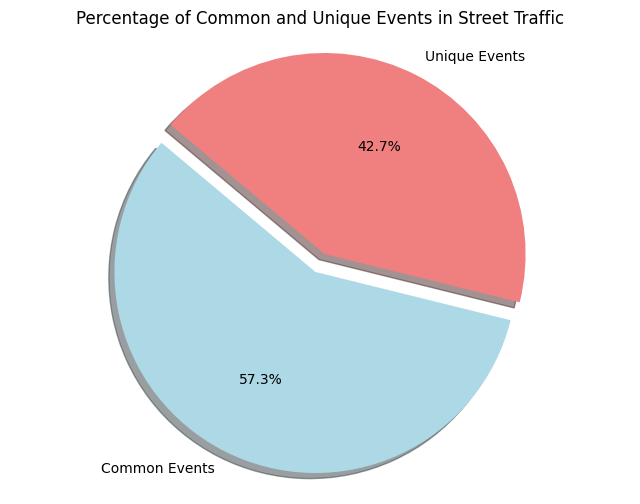

In [31]:
# Plot the percentages
labels = ['Common Events', 'Unique Events']
sizes = [common_percentage, unique_percentage]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Percentage of Common and Unique Events in Street Traffic')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('cross_model_st_events_plus.png')
plt.show()

### Tram

In [32]:
# For the same set of audios for which both the model classified correctly extract the percentages of common events of importance
tram = tram_model1.merge(tram_model2, how='inner', on="Filename")
tram

,Filename,events_after_x,events_after_y
0,/work/aistwal/dataset_tau2019/extracted-files/...,"['Vehicle', 'Train', 'Railroad car, train wago...","['Vehicle', 'Train', 'Sliding door', 'Car', 'B..."
1,/work/aistwal/dataset_tau2019/extracted-files/...,"['Speech', 'Vehicle', 'Car', 'Music', 'Bus', '...","['Speech', 'Vehicle', 'Train', 'Bus', 'Rail tr..."
2,/work/aistwal/dataset_tau2019/extracted-files/...,"['Mechanisms', 'Gears', 'Vehicle', 'Sliding do...","['Vehicle', 'Train', 'Rail transport', 'Door',..."
3,/work/aistwal/dataset_tau2019/extracted-files/...,"['Speech', 'Vehicle', 'Car', 'Bus', 'Music', '...","['Speech', 'Vehicle', 'Bus', 'Car', 'Sliding d..."
4,/work/aistwal/dataset_tau2019/extracted-files/...,"['Vehicle', 'Speech', 'Sliding door', 'Car', '...","['Sliding door', 'Vehicle', 'Door', 'Train', '..."
...,...,...,...
241,/work/aistwal/dataset_tau2019/extracted-files/...,"['Speech', 'Whispering', 'Vehicle', 'Music', '...","['Speech', 'Animal', 'Inside, small room', 'Mu..."
242,/work/aistwal/dataset_tau2019/extracted-files/...,"['Silence', 'Vehicle', 'Speech', 'Music', 'Ins...","['Silence', 'Door', 'Inside, small room', 'Sli..."
243,/work/aistwal/dataset_tau2019/extracted-files/...,"['Speech', 'Vehicle', 'Car', 'Field recording'...","['Vehicle', 'Car', 'Field recording', 'Outside..."
244,/work/aistwal/dataset_tau2019/extracted-files/...,"['Animal', 'Vehicle', 'Silence', 'Bird', 'Hors...","['Silence', 'Vehicle', 'Animal', 'Speech', 'Bi..."


In [33]:
import ast

# Flatten the list of events and extract unique events
unique_events_tram_model1 = set(event for sublist in tram['events_after_x'] for event in ast.literal_eval(sublist))
unique_events_tram_model2 = set(event for sublist in tram['events_after_y'] for event in ast.literal_eval(sublist))

print(len(unique_events_tram_model1))
print(len(unique_events_tram_model2))

# Calculate the common and unique events
common_events = unique_events_tram_model1.intersection(unique_events_tram_model2)
unique_to_model1 = unique_events_tram_model1 - unique_events_tram_model2
unique_to_model2 = unique_events_tram_model2 - unique_events_tram_model1

# Calculate percentages
total_events = len(unique_events_tram_model1.union(unique_events_tram_model2))
common_percentage = len(common_events) / total_events * 100
unique_percentage = 100 - common_percentage
print(common_percentage)
print(unique_percentage)

123
148
53.97727272727273
46.02272727272727


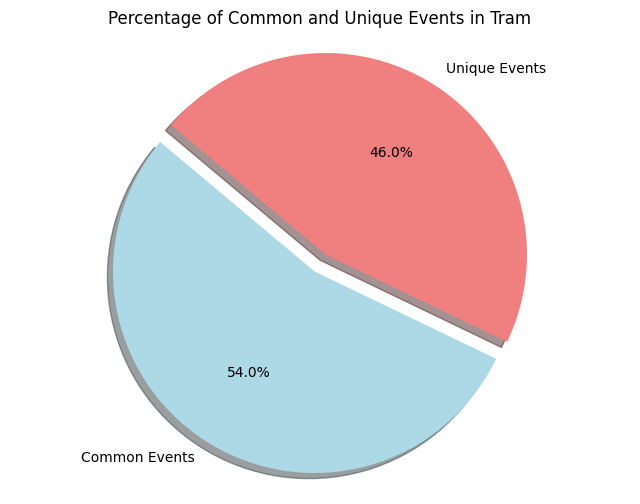

In [34]:
# Plot the percentages
labels = ['Common Events', 'Unique Events']
sizes = [common_percentage, unique_percentage]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Percentage of Common and Unique Events in Tram')
plt.axis('equal')
plt.savefig('cross_model_tram_events_plus.png')
plt.show()